In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
'''
DESCOMPLICA
Aula sobre funções não convexas explicando o que é e como funcionam.

Tipos de funções não convexas mais comuns:

    Relu - Mais comum, aqui, o gradiente é 0 para X < 0, o que impede a ativação do neurônio da rede.
    
    Leaky-Relu - Quando Relu não for efetiva, usa-se Leaky-Relu. 
        Na Leaky-Relu o gradiente é um valor peuqeno (como 0.01 ou parecido) para X < 0, 
        o que permite a ativação do neurônio da rede.
    
    SoftMax - É derivada da SigMoid, que é convexa, mas é util para problemas de classificação. 
        Transforma a saída da SigMoid (que é única) em uma saída multi label.
        Não é uma função de ativação de neurônios. É para ser usada na camada de saída.
'''

input type:  Tensor("Const_1:0", shape=(6,), dtype=float32)
input:  [ 1.  -0.5  3.4 -2.1  0.  -6.5]
return type:  Tensor("ReLU_1:0", shape=(6,), dtype=float32)
output:  [1.  0.  3.4 0.  0.  0. ]


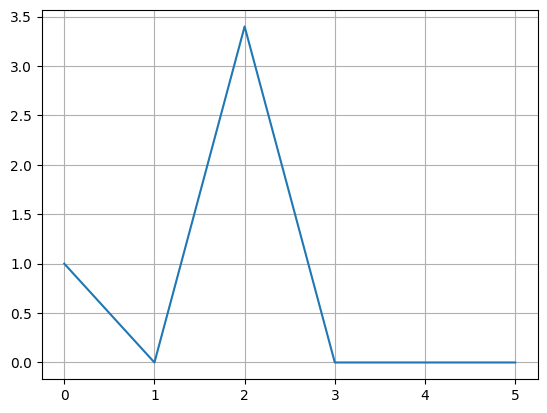

In [6]:
# Aqui é como a ReLU funciona
import tensorflow as tf
import matplotlib.pyplot as plt

#vetor constante de 6 posições (vulgo array)
a = tf.constant([1.0, -0.5, 3.4, -2.1, 0.0, -6.5], dtype=tf.float32)

#aqui aplicamos a relu e guardamos na var "b"
# tf.nn = "nn" para "neural networks"
b = tf.nn.relu(a, name='ReLU')

# assumindo q usamos uma versão atiga do tensorflow (Session) 
# usamos essa linha para ter compatibilidade com a lib e gerar os resultados da ReLU
tf.compat.v1.disable_eager_execution()

#inicializando sessão do tensorflow
with tf.compat.v1.Session() as sess:
    print('input type: ', a)
    print('input: ', sess.run(a))
    print('return type: ', b)
    print('output: ', sess.run(b))
    plt.plot(sess.run(b))
    plt.grid()
    plt.show()

'''
Resultado saiu igual ao do vídeo. A relu pode ser usada no algoritmo de retropropagação que 
fizemos anteriormente.
'''

In [ ]:
'''
Resumo

As funções convexas e não convexas estão dentro do tema de otimização que é uma área multidisciplinar 
que inclui inteligência artificial, matemática, pesquisa operacional, logística, entre diversas outras 
áreas. Para a maioria dos problemas, as funções convexas ofereciam soluções satisfatórias e em 
poucos casos usavam-se as funções não convexas. Com o surgimento do Deep Learning (DL), 
os problemas solucionáveis através dos algoritmos de DL começaram a oferecer situações onde as 
funções não convexas se tornam necessárias para trazer maiores benefícios. A Figura 1 ilustra os 
gráficos de uma função convexa sendo representada à esquerda pela cor azul e de uma função não 
convexa e à direita na cor vermelha.De forma bem superficial, as funções convexas são definidas 
como um subcampo da otimização matemática que lida com a minimização sobre conjuntos convexos. 
Elas são interessantes, pois em muitos casos o tempo de convergência é polinomial. 
Programação Linear (PL) e problema de mínimos quadrados são casos especiais de otimização convexa. 
Se um problema puder ser formulado como um problema de otimização convexa, 
então este problema poderá ser resolvido com eficiência, pois muitos métodos eficazes estão 
disponíveis na literatura.

No caso das funções não convexas, elas tratam qualquer problema em que o objetivo ou qualquer uma 
das restrições não são convexas. Nesse caso, mesmo problemas aparentemente simples com apenas dez 
variáveis podem ser desafiadores, enquanto problemas com algumas centenas de variáveis já se 
tornam praticamente intratáveis. Com isso, foram criados algoritmos que são capazes de fazer 
concessões para que se possa alcançar resultados factíveis e ainda assim interessantes, mesmo 
que não sejam ótimos. Estes algoritmos abrem possibilidades para a busca local, onde encontrar 
um bom ponto que pode ser suficientemente eficiente.

Encontrar um resultado ótimo com a otimização não convexa se torna problemático por diversos 
fatores, entre eles: ter várias regiões factíveis e muito planas, uma curvatura amplamente variável, 
vários pontos de montagem e vários mínimos locais dentro de cada região. Pode levar um tempo 
exponencial no número de variáveis e restrições para determinar a inviabilidade de solução de um 
problema desse tipo.

As redes neurais por padrão são aproximadores de funções universais, com neurônios suficientes que 
têm a capacidade de aproximar bem qualquer tipo de função. Dentre as funções a serem aproximadas, 
as funções não convexas estão ganhando mais destaque principalmente com o uso de DL. Na otimização 
não convexa, muitas funções convexas podem ser utilizadas, como stochastic gradient descent (SGD), 
mini-batching, stochastic variance-reduced gradient, e momentum. Existem também métodos 
especializados para resolver problemas não convexos conhecidos na pesquisa operacional, como método 
de minimização alternada, método branch-and-bound. Contudo, geralmente, esses métodos não são tão 
populares para problemas de aprendizado de máquina.

No mesmo contexto, existem variedades de resultados de convergência teórica, incluindo convergência 
para um ponto estacionário, convergência para um mínimo local, convergência local para o mínimo 
global e convergência global para o mínimo global. Como exemplo, consideremos o amplamente utilizado 
SGD. O SGD não convexo converge com uma taxa teórica lenta, mas não necessariamente para um mínimo 
local, o que certamente significa que não obrigatoriamente atinge o ótimo global. Esses insights 
teóricos podem ser fortalecidos por meio da incorporação de condições e suposições mais fortes. 
Com os anteriores, podemos provar sua convergência para um mínimo local com (ou sem) uma taxa de 
convergência explícita. Às vezes, se começarmos perto o suficiente do ótimo global, podemos 
alcançar uma convergência local para o ótimo global. No entanto, é muito caro em termos de tempo e 
aplicado só para casos específicos. Além disso, a convergência global para o mínimo global acontece 
quando podemos convergir onde quer que inicializemos. Para redes neurais profundas, 
sabe-se empiricamente que isso não acontece.

Por causa disso, quase sempre não podemos provar a convergência ou algo assim quando executamos o 
SGD de retropropagação em uma Deep Net. No DL, como na otimização não convexa, 
muitas coisas podem dar errado. Primeiro, pode ocorrer convergência para um mínimo local ruim. 
Nesse caso, podemos otimizar novamente o sistema com inicialização diferente e/ou adicionar 
ruído extra às atualizações de gradiente. Em segundo lugar, podemos enfrentar a convergência para 
um ponto de montagem que pode ser resolvido, encontrando o hessiano e calculando uma direção de 
descida. Em terceiro, ficar preso em uma região de baixa magnitude de gradiente que pode ser 
resolvida usando batchnorm ou projetando redes eficientemente usando uma função de ativação de 
unidade linear retificada (ReLU), por exemplo. Em quarto, podemos dar grandes passos e divergir 
por causa da alta curvatura. Nesse caso, podemos usar o tamanho do passo adaptável ou limitar mais 
intuitivamente o tamanho do passo do gradiente. Finalmente, se acabarmos tendo uma configuração 
errada de hiperparâmetros, podemos optar por métodos de otimização de hiperparâmetros.

O uso de funções não convexas no mundo de DL ainda está em fase de pesquisas, isso significa que 
há bastante espaço para evolução. Nas videoaulas será implementada uma função não convexa.
'''

input type:  Tensor("Const_1:0", shape=(6,), dtype=float32)
input:  [ 1.  -0.5  3.4 -2.1  0.  -6.5]
return type:  Tensor("leaky_re_lu_1_2/LeakyRelu:0", shape=(6,), dtype=float32)
output:  [ 1.   -0.15  3.4  -0.63  0.   -1.95]


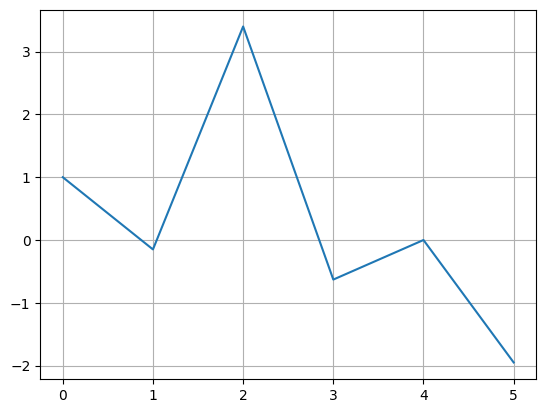

In [10]:
#implementação da leaky relu usando tensorflow - fiz solo
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU

lr = tf.keras.layers.LeakyReLU()

c = lr(a)

#inicializando sessão do tensorflow
with tf.compat.v1.Session() as sess:
    print('input type: ', a)
    print('input: ', sess.run(a))
    print('return type: ', c)
    print('output: ', sess.run(c))
    plt.plot(sess.run(c))
    plt.grid()
    plt.show()